# Benchmark Plots for Algorithms

In [1]:
%matplotlib nbagg

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import random
import collections
import importlib
import time

random.seed(5)
sorting_algos = ['insertion', 'merge', 'quick', 'selection']
iterations = [10, 100, 1000, 10000]

In [26]:
def construct_random_array_with_n_elements(n):
    return [random.randint(-n, n) for _ in xrange(n)]

all_arrays = {x: [construct_random_array_with_n_elements(x) for _ in xrange(10)] for x in iterations}
all_arrays
sorting_algos

['insertion', 'merge', 'quick', 'selection']

In [40]:
def average_time_it_takes_to_sort_arrays(sorting_algo, arrays):
    return sum(map(lambda array: time_it_takes_to_sort_array_using_algo(sorting_algo, array), arrays)) / max(len(arrays), 1)

def time_it_takes_to_sort_array_using_algo(algo, array):
    before = time.time()
    sort_array_using_algo(algo, array)
    return time.time() - before

def sort_array_using_algo(algo, array):
    sort = getattr(importlib.import_module('sorting.{}'.format(algo)), 'sort')
    return sort(array)

In [41]:
# timers = lambda algo, arrays: {_len: average_time_it_takes_to_sort_arrays(algo, ran_arrays) for _len, ran_arrays in arrays.items()}

# average_times = {
#     algo: timers(algo, all_arrays)
#     for algo in sorting_algos
# }


RuntimeError: maximum recursion depth exceeded

In [49]:
algo = 'insertion'
insertion_sort = {_len: average_time_it_takes_to_sort_arrays(algo, ran_arrays) for _len, ran_arrays in all_arrays.items()}

In [50]:
algo = 'merge'
merge_sort = {_len: average_time_it_takes_to_sort_arrays(algo, ran_arrays) for _len, ran_arrays in all_arrays.items()}

In [51]:
algo = 'selection'
selection_sort = {_len: average_time_it_takes_to_sort_arrays(algo, ran_arrays) for _len, ran_arrays in all_arrays.items()}

In [48]:
# Quick Sort is Currently Broken... TODO: Fix it...
# algo = 'quick'
# {_len: average_time_it_takes_to_sort_arrays(algo, ran_arrays) for _len, ran_arrays in all_arrays.items()}

{10: 1.1157989501953124e-05,
 100: 0.0004048347473144531,
 1000: 0.03537683486938477,
 10000: 3.804393172264099}

<IPython.core.display.Javascript object>


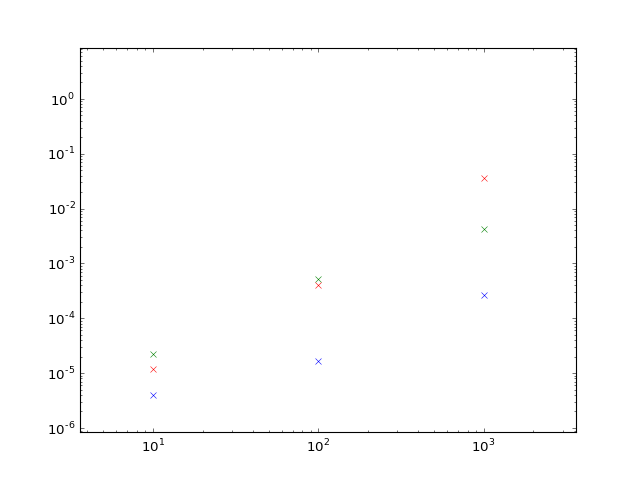

In [63]:
plt.xscale('log')
plt.yscale('log')
plt.plot(insertion_sort.keys(), insertion_sort.values(), 'x', linewidth=2)
plt.plot(merge_sort.keys(), merge_sort.values(), 'x', linewidth=2)
plt.plot(selection_sort.keys(), selection_sort.values(), 'x', linewidth=2)